<a href="https://colab.research.google.com/github/Machine-Learning-Tokyo/MLT-x-fastai/blob/master/mini-lessons/vision/sakura_ume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

Content from this notebook has been inspired from the fast.ai [docs](https://docs.fast.ai/vision.data.html) and course-v3 Part 1. In this notebook we'll go through some ways of creating your own image dataset and training a simple classifier. We'll also go through how to create an `ImageDataBunch` object for Image Classification, Object Detection and Segmentation tasks. `fastai` library uses a style called the Data Block API to simplify this process

## Creating your own dataset
### 梅？桜？
We will scrape plum blossom and cherry blossom images from google and classifying them. 
fastai provides a [notebook](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb) that illustrates how to scrape images.

In [0]:
#get csv files with urls of images
#!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/MLT-x-fastai/master/mini-lessons/data/sakura.csv
#!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/MLT-x-fastai/master/mini-lessons/data/sakura.csv
#!mkdir data
#!mv sakura.csv data
#!mv ume.csv data

In [0]:
# Path is a pathlib object that you can use to perform bash style file system operations
path = Path('data')
path,path.ls()

(PosixPath('data'),
 [PosixPath('data/sakura.csv'),
  PosixPath('data/cleaned.csv'),
  PosixPath('data/ume'),
  PosixPath('data/ume.csv'),
  PosixPath('data/models'),
  PosixPath('data/sakura')])

In [0]:
folders = ['sakura','ume']
files = ['sakura.csv','ume.csv']

In [0]:
def get_images(folders):
    #make folders of every class and download image into folder from urls
    for i in range(len(folders)):
        dest = path/folders[i]
        dest.mkdir(parents=True, exist_ok=True)
        download_images(path/files[i], dest, max_pics=200)

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
get_images(folders)

Error https://www.washingtonpost.com/resizer/ptYrYemiic56KlNEPa4smc3N_uE=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/2EJGK2Y4ZM3C7H2YAE3YXYJX5Y.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://img.washingtonpost.com/wp-apps/imrs.php?src=https://img.washingtonpost.com/blogs/capital-weather-gang/files/2016/03/TidalBasin3-lr.jpg&w=1484 HTTPSConnectionPool(host='img.washingtonpost.com', port=443): Read timed out. (read timeout=4)


Error http://www.akarijapanart.com/wp-content/uploads/2015/03/%E3%81%84%E3%81%AA%E3%81%B9%E6%A2%85%E3%81%BE%E3%81%A4%E3%82%8A-300x211.jpg HTTPConnectionPool(host='www.akarijapanart.com', port=80): Max retries exceeded with url: /wp-content/uploads/2015/03/%E3%81%84%E3%81%AA%E3%81%B9%E6%A2%85%E3%81%BE%E3%81%A4%E3%82%8A-300x211.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb85c83d198>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://image.shutterstock.com/image-photo/ume-blossom-tree-450w-772454977.jpg HTTPSConnectionPool(host='image.shutterstock.com', port=443): Read timed out. (read timeout=4)
Error http://www.akarijapanart.com/wp-content/uploads/2015/03/plum-flower.jpg HTTPConnectionPool(host='www.akarijapanart.com', port=80): Max retries exceeded with url: /wp-content/uploads/2015/03/plum-flower.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb85c83dc50>: Failed to e

In [0]:
def check_images(folders):
    for c in folders:
        print(c)
        #Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`.
        verify_images(path/c, delete=True, max_size=1024)

In [0]:
check_images(folders)

sakura


cannot identify image file <_io.BufferedReader name='data/sakura/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000052.png'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000108.jpeg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000087.jpg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000134.jpeg'>


/home/paperspace/projects/fastai-1.0/lib/python3.6/site-packages/PIL/Image.py:1006: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/sakura/00000008.jpeg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000046.jpeg'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000076.png'>
cannot identify image file <_io.BufferedReader name='data/sakura/00000110.jpg'>
ume


/home/paperspace/projects/fastai-1.0/lib/python3.6/site-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/ume/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='data/ume/00000167.jpg'>
cannot identify image file <_io.BufferedReader name='data/ume/00000091.jpg'>


In [0]:
len((path/folders[0]).ls()), len((path/folders[1]).ls())

(187, 193)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", ds_tfms=get_transforms(),valid_pct=0.1, size=224, num_workers=4)

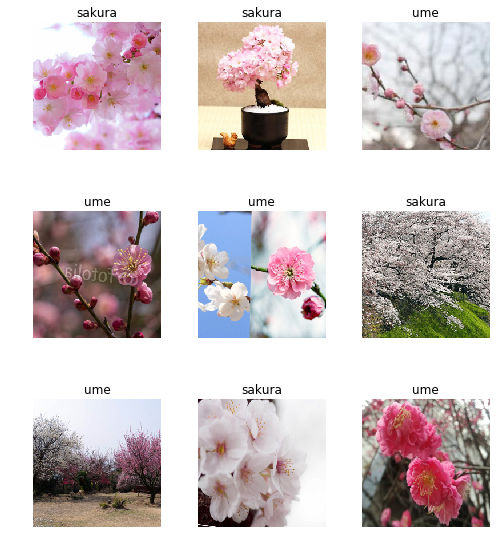

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,1.005482,0.601964,0.368421,00:07
2,0.781337,0.467467,0.236842,00:06
3,0.649515,0.513107,0.210526,00:07
4,0.582374,0.505246,0.210526,00:06


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.352331,0.473341,0.236842,00:07
2,0.327563,0.416043,0.210526,00:06


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

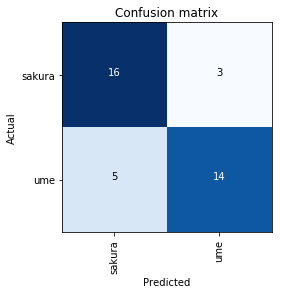

In [0]:
interp.plot_confusion_matrix()

Do not the cells below if running on colab. It will crash because colab doesn't support ipython widgets 

In [0]:
from fastai.widgets import *

In [0]:
dataset, idxs = DatasetFormatter().from_toplosses(learn)

In [0]:
ImageCleaner(dataset, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())